In [1]:
%load_ext autoreload
%autoreload 2  
from pipeline import loader as lo
from pipeline import explorer as ex
from pipeline import preprocessor as pro
from pipeline import _util as ut
from pipeline import evaluator as ev
from pipeline import features_generator as fe
from pipeline import minmax_scaler as minmax
from pipeline import kmeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## load the data

In [2]:
df = lo.load('../data/projects_2012_2013.csv')
df['date_posted'] = pd.to_datetime(df['date_posted'])
df['datefullyfunded'] = pd.to_datetime(df['datefullyfunded'])

### check the missing rate of each column

In [3]:
df.isnull().sum(axis=0)/ df.shape[0]

projectid                                 0.000000
teacher_acctid                            0.000000
schoolid                                  0.000000
school_ncesid                             0.073878
school_latitude                           0.000000
school_longitude                          0.000000
school_city                               0.000000
school_state                              0.000000
school_metro                              0.121815
school_district                           0.001376
school_county                             0.000000
school_charter                            0.000000
school_magnet                             0.000000
teacher_prefix                            0.000000
primary_focus_subject                     0.000120
primary_focus_area                        0.000120
secondary_focus_subject                   0.324510
secondary_focus_area                      0.324510
resource_type                             0.000136
poverty_level                  

#### Preprocessing the data

In [4]:
pro.fill_median(df, ['students_reached'])
pro.fill_most(df, ['school_metro',
 'school_district',
 'primary_focus_subject',
 'primary_focus_area',
 'secondary_focus_subject',
 'secondary_focus_area',
 'resource_type',
 'grade_level'])
df.drop(['projectid','teacher_acctid','schoolid','school_ncesid'], axis =1, inplace=True)

### make dummies

In [5]:
cat_cols = ['school_city', 'school_state', 
            'school_metro','school_charter',
            'primary_focus_subject','primary_focus_area', 
            'grade_level','resource_type']
df = fe.dummize(df, cat_cols)

### scale the continuous data

In [6]:
minmax.min_max(df,['total_price_including_optional_support', 'students_reached'])

### Pick the features of the clustering

In [7]:
features = []
for item in df.columns:
    if 'school_metro' in item\
    or 'school_charter' in item\
    or 'grade_level_Grades' in item\
    or 'resource_type' in item\
    or 'primary_focus_subject' in item:
        features.append(item)
features.extend(['total_price_including_optional_support', 'students_reached'])

## K-means 

In [8]:
df['label'] = kmeans.label(2, df[features])

### show the results in term of the continous features

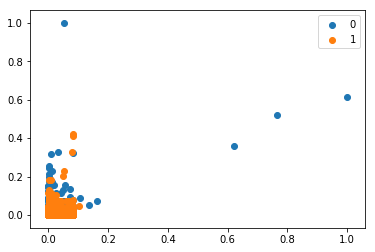

In [9]:
groups = df.groupby('label')
fig, ax = plt.subplots()
for pred_class, group in groups:
    ax.scatter(group.students_reached, group.total_price_including_optional_support, label=pred_class)
ax.legend()
plt.show()

### Show the summary of each cluster

In [10]:
avg_table, count_table = kmeans.summarize(df,'label')

### Mean table

In [11]:
avg_table

,label,0,1
school_latitude,mean,37.142624546914675,36.31267717748816
school_longitude,mean,-96.0601475161379,-95.53153410394792
total_price_including_optional_support,mean,0.0033999582391226186,0.0034549031787234888
students_reached,mean,0.0076633667593611525,0.007959518794541898
school_city_Abbeville,mean,0.0005290937012040108,0.0005896598925976624
school_city_Aberdeen,mean,0.00021938031513337033,6.317784563546383e-05
school_city_Abilene,mean,0.00024518976397259036,0.0
school_city_Abingdon,mean,2.580944883922004e-05,0.0
school_city_Abington,mean,0.0,4.211856375697589e-05
school_city_Abita Springs,mean,0.0001419519686157102,0.0


### Count_table

In [12]:
count_table

label
0    77491
1    47485
Name: label, dtype: int64

### The distinctive features of data points in this cluster

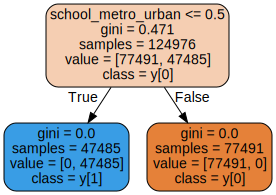

In [13]:
kmeans.viz(df, features, 'label', 1, 5)

### drop one continuous var, then check the change

In [14]:
features.remove('school_metro_urban')

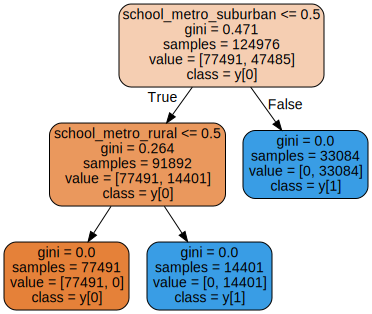

In [15]:
kmeans.viz(df, features, 'label', 1, 5)

## merge clusters into one
Before merge we have two labels 0,1. after merging, only one new label 5 left.

In [16]:
kmeans.merge_clusters(df, 5, [0, 1])['label'].unique()

array([5])

## recluster with a new k

In [17]:
df['label'] = kmeans.label(4, df[features])
df.label.unique()

array([2, 1, 3, 0])

## Split a specific cluster into many cluster

In [18]:
df = kmeans.split_cluster(df, features, 1, 5)
df.label.unique()

array([6, 5, 4, 7, 8, 2, 3, 0])

### As we can see here the cluster 1 disappears, and split it into 5 new cluster : 4,5,6,7,8

## top5 analysis

In [19]:
data = lo.load('../data/top5.csv')

In [20]:
data['date_posted'] = pd.to_datetime(df['date_posted'])
data['datefullyfunded'] = pd.to_datetime(df['datefullyfunded'])
pro.fill_median(data, ['students_reached'])
pro.fill_most(data, ['school_metro',
 'school_district',
 'primary_focus_subject',
 'primary_focus_area',
 'secondary_focus_subject',
 'secondary_focus_area',
 'resource_type',
 'grade_level'])
data.drop(['projectid','teacher_acctid','schoolid','school_ncesid'], axis =1, inplace=True)
cat_cols = ['school_city', 'school_state', 
            'school_metro','school_charter',
            'primary_focus_subject','primary_focus_area', 
            'grade_level','resource_type']
data = fe.dummize(data, cat_cols)
minmax.min_max(data,['total_price_including_optional_support', 'students_reached'])

In [21]:
data['label'] = kmeans.label(2, data[features])

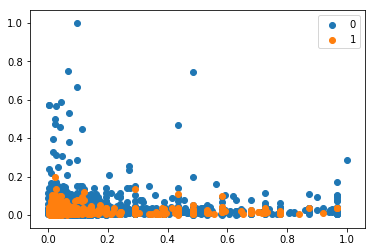

In [22]:
groups = data.groupby('label')
fig, ax = plt.subplots()
for pred_class, group in groups:
    ax.scatter(group.students_reached, group.total_price_including_optional_support, label=pred_class)
ax.legend()
plt.show()

In [23]:
avg_tab, count_tab = kmeans.summarize(data,'label')

In [24]:
avg_tab

,label,0,1
Unnamed: 0,mean,63262.933553132134,61876.341717259325
school_latitude,mean,36.8848102774537,36.81245166565486
school_longitude,mean,-95.65281863225977,-95.92550051994816
total_price_including_optional_support,mean,0.024247201589153927,0.018242932768357638
students_reached,mean,0.11488050008449727,0.04813361676998325
school_city_Abbeville,mean,0.0,0.0013009540329575022
school_city_Abilene,mean,0.000507227998985544,0.0004336513443191674
school_city_Adams Center,mean,0.000253613999492772,0.0
school_city_Adel,mean,0.000253613999492772,0.0
school_city_Adelanto,mean,0.000253613999492772,0.0


In [25]:
count_tab

label
0    3943
1    2306
Name: label, dtype: int64

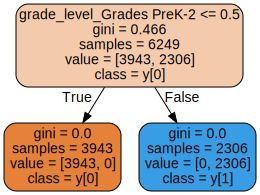

In [26]:
kmeans.viz(data, features, 'label', 1, 5)

In [28]:
features.remove('grade_level_Grades PreK-2')

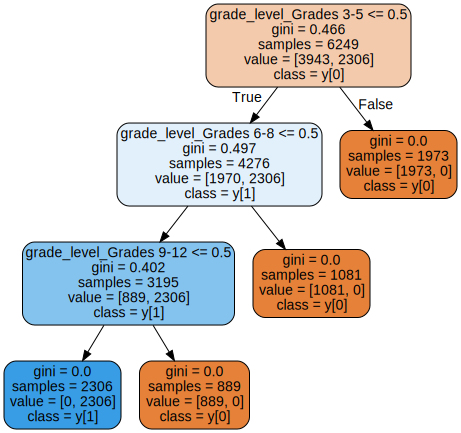

In [29]:
kmeans.viz(data, features, 'label', 1, 5)